In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r"C:\Users\Anuj Bohra\Desktop\ArogoAI\Severity\NewApproach\DiabetesDataset.csv")

X = df.drop(columns=["Outcome"])  
y = df["Outcome"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#random forestt
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

In [5]:
# Use TreeExplainer for Random Forest
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap_importances = np.abs(shap_values).mean(axis=0)

In [6]:
print(f"X_test shape: {X_test.shape}")  # Should be (n_samples, 8)


X_test shape: (154, 8)


In [7]:
print(f"SHAP values type: {type(shap_values)}")
print(f"SHAP values shape: {shap_values.shape}")

SHAP values type: <class 'numpy.ndarray'>
SHAP values shape: (154, 8, 2)


In [8]:
shap_importances = np.abs(shap_values).mean(axis=(0, 2))  # Mean across samples and output dimensions

In [9]:
# Convert to 1D
rf_importances = np.array(rf_importances).flatten()

# Print SHAP values shape and type
print(f"SHAP values type: {type(shap_values)}")
print(f"SHAP values shape: {shap_values.shape}")

# Extract SHAP feature importances (handling multi-output)
shap_importances = np.abs(shap_values).mean(axis=(0, 2))  # Reduce to shape (8,)

# Ensure correct shape before proceeding
assert len(shap_importances) == X.shape[1], f"SHAP importance shape mismatch! Expected {X.shape[1]}, got {len(shap_importances)}"

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "RandomForest": rf_importances.flatten(),
    "SHAP": shap_importances.flatten(),
}).set_index("Feature")

# Normalize feature importances
feature_importance_df = feature_importance_df / feature_importance_df.max()

# Display results
print(feature_importance_df)


SHAP values type: <class 'numpy.ndarray'>
SHAP values shape: (154, 8, 2)
                          RandomForest      SHAP
Feature                                         
Pregnancies                   0.295721  0.170653
Glucose                       1.000000  1.000000
BloodPressure                 0.340464  0.113366
SkinThickness                 0.253594  0.109011
Insulin                       0.294061  0.138538
BMI                           0.656652  0.601175
DiabetesPedigreeFunction      0.478118  0.309676
Age                           0.544423  0.491623


<Figure size 1000x600 with 0 Axes>

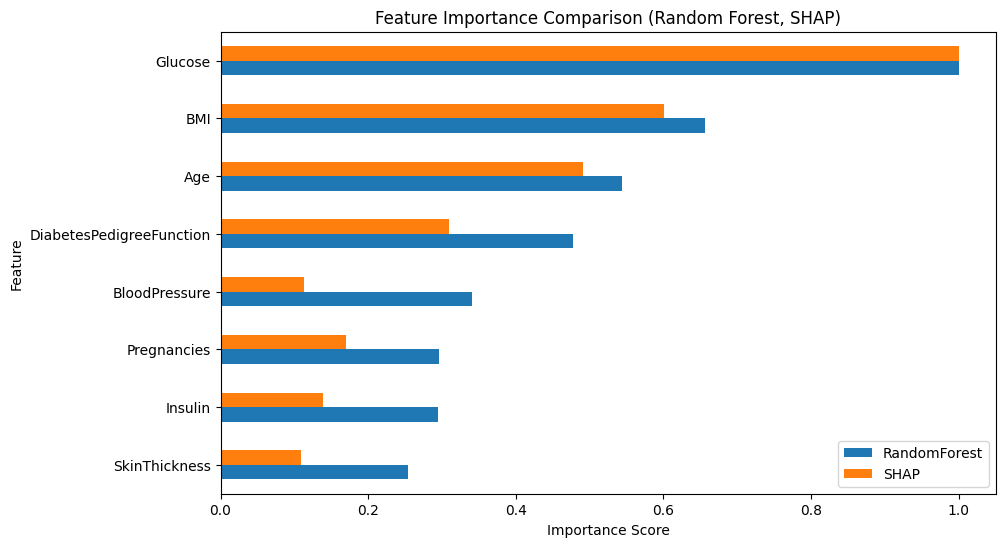

                          RandomForest      SHAP
Feature                                         
Pregnancies                   0.295721  0.170653
Glucose                       1.000000  1.000000
BloodPressure                 0.340464  0.113366
SkinThickness                 0.253594  0.109011
Insulin                       0.294061  0.138538
BMI                           0.656652  0.601175
DiabetesPedigreeFunction      0.478118  0.309676
Age                           0.544423  0.491623


In [10]:

# --- Visualization ---
plt.figure(figsize=(10, 6))
feature_importance_df.sort_values(by="RandomForest", ascending=True).plot(kind="barh", figsize=(10, 6))
plt.title("Feature Importance Comparison (Random Forest, SHAP)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.legend()
plt.show()

# Print feature importance values
print(feature_importance_df)


In [11]:
import pandas as pd
corr_matrix = X.corrwith(y)  # Compute correlation of each feature with target
print(corr_matrix.sort_values(ascending=False))

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64
